In [12]:
import msprime
import tskit
import allel
import numpy as np
from IPython.display import SVG

# More simulations

This notebook gives some examples of more indepth simulation examples with msprime.

## Discrete time Wright-Fisher model

Msprime has very recently gained support for a backwards time Wright-Fisher model. This is useful in cases where the coalescent is no longer a good approximation.


In [6]:
ts = msprime.simulate(
    sample_size=6, Ne=1000, model="dtwf", random_seed=2)
print(ts.tables.nodes)

id	flags	population	individual	time	metadata
0	1	0	-1	0.00000000000000	
1	1	0	-1	0.00000000000000	
2	1	0	-1	0.00000000000000	
3	1	0	-1	0.00000000000000	
4	1	0	-1	0.00000000000000	
5	1	0	-1	0.00000000000000	
6	0	0	-1	78.00000000000000	
7	0	0	-1	227.00000000000000	
8	0	0	-1	261.00000000000000	
9	0	0	-1	272.00000000000000	
10	0	0	-1	3610.00000000000000	


Notices that all the node times are integer generations now.

We can also combine the DTWF with the standard coalescent:

In [7]:
ts = msprime.simulate(
    sample_size=6, Ne=1000, model="dtwf", random_seed=2,
    demographic_events=[
        msprime.SimulationModelChange(time=500, model="hudson")])
print(ts.tables.nodes)

id	flags	population	individual	time	metadata
0	1	0	-1	0.00000000000000	
1	1	0	-1	0.00000000000000	
2	1	0	-1	0.00000000000000	
3	1	0	-1	0.00000000000000	
4	1	0	-1	0.00000000000000	
5	1	0	-1	0.00000000000000	
6	0	0	-1	78.00000000000000	
7	0	0	-1	227.00000000000000	
8	0	0	-1	261.00000000000000	
9	0	0	-1	272.00000000000000	
10	0	0	-1	1629.06982528980075	


If we're only interested in the recent past though, maybe we don't need to simulate the deep past **at all**. We can do this with the ``end_time`` option:

In [9]:
ts = msprime.simulate(
    sample_size=6, Ne=1000, model="dtwf", random_seed=2, end_time=500)
print(ts.tables.nodes)

id	flags	population	individual	time	metadata
0	1	0	-1	0.00000000000000	
1	1	0	-1	0.00000000000000	
2	1	0	-1	0.00000000000000	
3	1	0	-1	0.00000000000000	
4	1	0	-1	0.00000000000000	
5	1	0	-1	0.00000000000000	
6	0	0	-1	78.00000000000000	
7	0	0	-1	227.00000000000000	
8	0	0	-1	261.00000000000000	
9	0	0	-1	272.00000000000000	
10	0	0	-1	500.00000000000000	
11	0	0	-1	500.00000000000000	


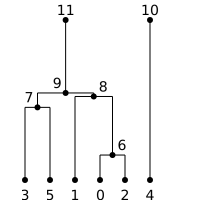

In [13]:
tree = ts.first()
display(SVG(tree.draw()))

This a peculiar looking tree! It has two roots, and two 'unary' edges, connecting simulated nodes to the time that the simulation finished. Tskit is perfectly happy working with trees of this type, and so you need to be aware of the possibility of trees with multiple roots.

In [14]:
print("num roots = ", tree.num_roots)
print("roots = ", tree.roots)

num roots =  2
roots =  [11, 10]


Most of the time we don't have to worry about this, so we can usually use the ``tree.root`` variable to get the root. If we try to do this when there are multiple roots, tskit will helpfully raise an error:

In [16]:
tree.root

ValueError: More than one root exists. Use tree.roots instead

## Full ARG

In msprime we usually want to simulate the coalescent with recombination and represent the output as efficiently as possible. As a result, we don’t store individual recombination events, but rather their effects on the output tree sequence. We also do not explicitly store common ancestor events that do not result in marginal coalescences. For some purposes, however, we want to get information on the full history of the simulation, not just the minimal representation of its outcome. The record_full_arg option to simulate() provides this functionality, as illustrated in the following example:

id	flags	population	individual	time	metadata
0	1	0	-1	0.00000000000000	
1	1	0	-1	0.00000000000000	
2	1	0	-1	0.00000000000000	
3	1	0	-1	0.00000000000000	
4	1	0	-1	0.00000000000000	
5	0	0	-1	0.31846010419674	
6	0	0	-1	0.82270149120229	
7	0	0	-1	1.21622732856555	
8	131072	0	-1	1.51542116580501	
9	131072	0	-1	1.51542116580501	
10	262144	0	-1	2.12814260094490	
11	0	0	-1	2.16974122606933	


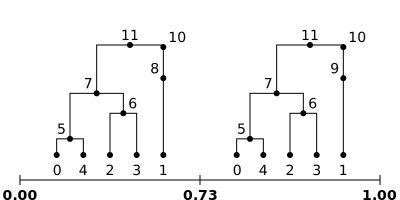

In [20]:
ts = msprime.simulate(
    sample_size=5, recombination_rate=0.1, record_full_arg=True, random_seed=42)
print(ts.tables.nodes)

SVG(ts.draw_svg())

## Adding mutations to existing trees

Usually in msprime we simulate mutations using the ``mutation_rate`` parameter to the simulate function. However, we can also add mutatations after the fact, using the [mutate function](https://msprime.readthedocs.io/en/latest/api.html#msprime.mutate). This approach is also a bit more flexible, as we can specify the mutation model and time interval over which we want mutations to fall.

id	flags	population	individual	time	metadata
0	1	0	-1	0.00000000000000	
1	1	0	-1	0.00000000000000	
2	1	0	-1	0.00000000000000	
3	1	0	-1	0.00000000000000	
4	1	0	-1	0.00000000000000	
5	0	0	-1	0.39164207865467	
6	0	0	-1	0.57381488107735	
7	0	0	-1	2.65100837878677	
8	0	0	-1	5.28260394760454	
id	position	ancestral_state	metadata
id	site	node	derived_state	parent	metadata


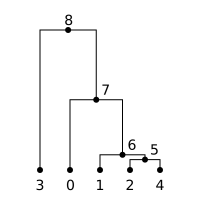

In [27]:
ts = msprime.simulate(5, random_seed=32)
# Original TS has no mutations
print(ts.tables.nodes)
display(SVG(ts.first().draw_svg()))

id	position	ancestral_state	metadata
0	0.01376845	0	
1	0.11744338	0	
2	0.27646426	0	
3	0.39378235	0	
4	0.43772774	0	
5	0.45272981	0	
6	0.50099513	0	
7	0.50308317	0	
8	0.56119619	0	
9	0.77282662	0	
10	0.80187217	0	
11	0.87593264	0	
12	0.88264119	0	
13	0.95813936	0	
14	0.98713930	0	
id	site	node	derived_state	parent	metadata
0	0	3	1	-1	
1	1	7	1	-1	
2	2	0	1	-1	
3	3	7	1	-1	
4	4	1	1	-1	
5	5	7	1	-1	
6	6	6	1	-1	
7	7	3	1	-1	
8	8	3	1	-1	
9	9	3	1	-1	
10	10	0	1	-1	
11	11	0	1	-1	
12	12	3	1	-1	
13	13	0	1	-1	
14	14	7	1	-1	


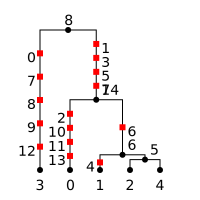

In [30]:
mutated_ts = msprime.mutate(ts, rate=1, random_seed=1234)
print(mutated_ts.tables.sites)
print(mutated_ts.tables.mbutations)
display(SVG(mutated_ts.first().draw_svg()))

We can limit the time span over which these mutations can fall:

id	position	ancestral_state	metadata
0	0.77135992	0	
1	0.80187217	0	
2	0.86066977	0	
id	site	node	derived_state	parent	metadata
0	0	0	1	-1	
1	1	3	1	-1	
2	2	0	1	-1	


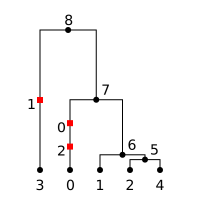

In [31]:
mutated_ts = msprime.mutate(ts, rate=1, start_time=0.5, end_time=2.0, random_seed=1234)
print(mutated_ts.tables.sites)
print(mutated_ts.tables.mutations)
display(SVG(mutated_ts.first().draw_svg()))

We can also use the ``model`` argument to tell msprime to use the ACGT alphabet rather than 0/1:

In [34]:
mutated_ts = msprime.mutate(
    ts, rate=1, model=msprime.InfiniteSites(msprime.NUCLEOTIDES),
    random_seed=1234)
print(mutated_ts.tables.sites)
print(mutated_ts.tables.mutations)

id	position	ancestral_state	metadata
0	0.01376845	A	
1	0.11744338	T	
2	0.27646426	A	
3	0.39378235	G	
4	0.43772774	G	
5	0.45272981	C	
6	0.50099513	C	
7	0.50308317	C	
8	0.56119619	A	
9	0.77282662	C	
10	0.80187217	T	
11	0.87593264	A	
12	0.88264119	A	
13	0.95813936	A	
14	0.98713930	C	
id	site	node	derived_state	parent	metadata
0	0	3	C	-1	
1	1	7	G	-1	
2	2	0	T	-1	
3	3	7	C	-1	
4	4	1	C	-1	
5	5	7	G	-1	
6	6	6	T	-1	
7	7	3	T	-1	
8	8	3	C	-1	
9	9	3	A	-1	
10	10	0	A	-1	
11	11	0	G	-1	
12	12	3	T	-1	
13	13	0	G	-1	
14	14	7	G	-1	


In [38]:
for var in mutated_ts.variants():
    print(var.position, var.alleles, var.genotypes, sep="\t")

0.01376845221966505	('A', 'C')	[0 0 0 1 0]
0.11744338320568204	('T', 'G')	[1 1 1 0 1]
0.27646425971761346	('A', 'T')	[1 0 0 0 0]
0.39378235023468733	('G', 'C')	[1 1 1 0 1]
0.4377277372404933	('G', 'C')	[0 1 0 0 0]
0.45272980886511505	('C', 'G')	[1 1 1 0 1]
0.5009951256215572	('C', 'T')	[0 1 1 0 1]
0.5030831657350063	('C', 'T')	[0 0 0 1 0]
0.561196189140901	('A', 'C')	[0 0 0 1 0]
0.7728266199119389	('C', 'A')	[0 0 0 1 0]
0.8018721740227193	('T', 'A')	[1 0 0 0 0]
0.8759326399303973	('A', 'G')	[1 0 0 0 0]
0.8826411948539317	('A', 'T')	[0 0 0 1 0]
0.9581393552944064	('A', 'G')	[1 0 0 0 0]
0.9871393032371998	('C', 'G')	[1 1 1 0 1]


Tskit can handle arbitrarily complex patterns of single-site mutations, but unfortunately msprime doesn't have support for mutation models like Jukes-Cantor. Hopefully someone will implement this some day...